## Load Base Stable Diffusion Model

In [1]:
from diffusers import StableDiffusionPipeline
from pruna.algorithms.smasher_config import AutoSmasherConfig
from pruna.smash import smash
import torch
import requests
from PIL import Image
from io import BytesIO

from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image
import torch

pipe = AutoPipelineForInpainting.from_pretrained("diffusers/stable-diffusion-xl-1.0-inpainting-0.1", torch_dtype=torch.float16, variant="fp16").to("cuda")

img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

image = load_image(img_url).resize((1024, 1024))
mask_image = load_image(mask_url).resize((1024, 1024))

prompt = "a tiger sitting on a park bench"
generator = torch.Generator(device="cuda").manual_seed(0)

Post-training Optimization Tool is deprecated and will be removed in the future. Please use Neural Network Compression Framework instead: https://github.com/openvinotoolkit/nncf
Nevergrad package could not be imported. If you are planning to use any hyperparameter optimization algo, consider installing it using pip. This implies advanced usage of the tool. Note that nevergrad is compatible only with Python 3.7+


Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


## Smash it!

In [2]:
from pruna.algorithms.smasher_config import SmasherConfig

smasher_config = SmasherConfig()
smasher_config['compiler'] = 'diffusers'
smasher_config['max_batch_size'] = 1
smasher_config['image_height'] = 1024
smasher_config['image_width'] = 1024
smasher_config['version'] = 'xl-1.0'
smasher_config['static_shape'] = False
smasher_config['unet_dim'] = 9

In [3]:
smashed_model = smash(
        model=pipe,
        data_module="inpaint",
        api_key='your-api-key',
        model_config=None,
        smasher_config=smasher_config,
        device='cuda',
    )

Compile...
Exporting model: /nfs/students/rachwan/huggingface/.cache/onnx/vae_encoder/model.onnx
Generating optimizing model: /nfs/students/rachwan/huggingface/.cache/onnx/vae_encoder.opt/model.onnx
VAEEncoder: original
VAEEncoder: cleanup


2023-11-15 09:39:11.713353675 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3294578, index: 0, mask: {64, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:11.713361845 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3294579, index: 1, mask: {1, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:11.713464784 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3294580, index: 2, mask: {65, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:11.713462164 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3294582, index: 4, mask: {66, }, error code: 22 error msg: Invalid argument. Specify th

[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Failed to load model with error: /onnxruntime_src/onnxruntime/core/graph/model.cc:146 onnxruntime::Model::Model(onnx::ModelProto&&, const PathString&, const IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) Unsupported model IR version: 9, max supported IR version: 8


2023-11-15 09:39:12.214973562 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3294705, index: 0, mask: {64, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:12.214973782 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3294706, index: 1, mask: {1, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:12.215069871 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3294707, index: 2, mask: {65, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:12.215070281 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3294708, index: 3, mask: {2, }, error code: 22 error msg: Invalid argument. Specify the

[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Failed to load model with error: /onnxruntime_src/onnxruntime/core/graph/model.cc:146 onnxruntime::Model::Model(onnx::ModelProto&&, const PathString&, const IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) Unsupported model IR version: 9, max supported IR version: 8


or msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:12.218044930 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3294822, index: 117, mask: {59, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:12.218057650 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3294747, index: 42, mask: {85, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:12.218065360 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3294823, index: 118, mask: {123, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:12.218070150 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np fail

[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Failed to load model with error: /onnxruntime_src/onnxruntime/core/graph/model.cc:146 onnxruntime::Model::Model(onnx::ModelProto&&, const PathString&, const IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) Unsupported model IR version: 9, max supported IR version: 8


 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:12.519211192 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3294920, index: 88, mask: {108, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:12.519218012 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3294865, index: 33, mask: {17, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:12.519178833 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3294919, index: 87, mask: {44, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:12.519225472 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np fa

VAEEncoder: fold constants
VAEEncoder: shape inference
VAEEncoder: finished
Exporting model: /nfs/students/rachwan/huggingface/.cache/onnx/clip/model.onnx
Generating optimizing model: /nfs/students/rachwan/huggingface/.cache/onnx/clip.opt/model.onnx


2023-11-15 09:39:18.616167245 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3295750, index: 1, mask: {1, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:18.616170985 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3295749, index: 0, mask: {64, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:18.616214074 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3295751, index: 2, mask: {65, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:18.618802588 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3295752, index: 3, mask: {2, }, error code: 22 error msg: Invalid argument. Specify the

[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Failed to load model with error: /onnxruntime_src/onnxruntime/core/graph/model.cc:146 onnxruntime::Model::Model(onnx::ModelProto&&, const PathString&, const IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) Unsupported model IR version: 9, max supported IR version: 8


 env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3295808, index: 58, mask: {93, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:18.619411312 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3295868, index: 118, mask: {123, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:18.619419302 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3295802, index: 52, mask: {90, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:18.619425522 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3295869, index: 119, mask: {60, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinit

[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Failed to load model with error: /onnxruntime_src/onnxruntime/core/graph/model.cc:146 onnxruntime::Model::Model(onnx::ModelProto&&, const PathString&, const IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) Unsupported model IR version: 9, max supported IR version: 8


2023-11-15 09:39:20.716186951 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3296279, index: 0, mask: {64, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:20.716265421 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3296281, index: 2, mask: {65, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:20.716269600 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3296280, index: 1, mask: {1, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:20.716274820 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3296282, index: 3, mask: {2, }, error code: 22 error msg: Invalid argument. Specify the

[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Failed to load model with error: /onnxruntime_src/onnxruntime/core/graph/model.cc:146 onnxruntime::Model::Model(onnx::ModelProto&&, const PathString&, const IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) Unsupported model IR version: 9, max supported IR version: 8


 argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:20.719967642 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3296354, index: 75, mask: {38, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:20.719970492 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3296325, index: 46, mask: {87, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:20.719978642 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3296356, index: 77, mask: {39, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:20.719992202 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 329

Exporting model: /nfs/students/rachwan/huggingface/.cache/onnx/clip2/model.onnx
Generating optimizing model: /nfs/students/rachwan/huggingface/.cache/onnx/clip2.opt/model.onnx


2023-11-15 09:39:46.369336270 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3298562, index: 0, mask: {64, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:46.369347329 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3298563, index: 1, mask: {1, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:46.369371949 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3298565, index: 3, mask: {2, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:46.369380479 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3298564, index: 2, mask: {65, }, error code: 22 error msg: Invalid argument. Specify the

[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Failed to load model with error: /onnxruntime_src/onnxruntime/core/graph/model.cc:146 onnxruntime::Model::Model(onnx::ModelProto&&, const PathString&, const IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) Unsupported model IR version: 9, max supported IR version: 8


2023-11-15 09:39:52.364903979 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3299486, index: 1, mask: {1, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:52.364899529 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3299485, index: 0, mask: {64, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:52.364949339 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3299488, index: 3, mask: {2, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:52.364986779 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3299489, index: 4, mask: {66, }, error code: 22 error msg: Invalid argument. Specify the

[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Failed to load model with error: /onnxruntime_src/onnxruntime/core/graph/model.cc:146 onnxruntime::Model::Model(onnx::ModelProto&&, const PathString&, const IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) Unsupported model IR version: 9, max supported IR version: 8


2023-11-15 09:39:57.750055758 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3299889, index: 1, mask: {1, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:57.750051788 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3299888, index: 0, mask: {64, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:57.750107787 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3299891, index: 3, mask: {2, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:57.750064257 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3299890, index: 2, mask: {65, }, error code: 22 error msg: Invalid argument. Specify the

[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Failed to load model with error: /onnxruntime_src/onnxruntime/core/graph/model.cc:146 onnxruntime::Model::Model(onnx::ModelProto&&, const PathString&, const IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) Unsupported model IR version: 9, max supported IR version: 8


: 3299953, index: 65, mask: {33, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:57.764185573 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3299954, index: 66, mask: {97, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:57.764207443 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3300005, index: 117, mask: {59, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:57.764208833 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3300011, index: 123, mask: {62, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:39:57.764212393 [E:onnxruntime:Defaul

Exporting model: /nfs/students/rachwan/huggingface/.cache/onnx/unetxl/model.onnx
Generating optimizing model: /nfs/students/rachwan/huggingface/.cache/onnx/unetxl.opt/model.onnx
UNetXL: original
UNetXL: cleanup


2023-11-15 09:42:37.457026746 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3315568, index: 0, mask: {64, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:42:37.457037026 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3315569, index: 1, mask: {1, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:42:37.457155304 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3315570, index: 2, mask: {65, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:42:37.457183304 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3315572, index: 4, mask: {66, }, error code: 22 error msg: Invalid argument. Specify th

[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Failed to load model with error: /onnxruntime_src/onnxruntime/core/graph/model.cc:146 onnxruntime::Model::Model(onnx::ModelProto&&, const PathString&, const IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) Unsupported model IR version: 9, max supported IR version: 8


2023-11-15 09:42:49.310644522 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3316768, index: 1, mask: {1, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:42:49.310645682 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3316767, index: 0, mask: {64, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:42:49.310744851 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3316769, index: 2, mask: {65, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:42:49.310780360 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3316771, index: 4, mask: {66, }, error code: 22 error msg: Invalid argument. Specify th

[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Failed to load model with error: /onnxruntime_src/onnxruntime/core/graph/model.cc:146 onnxruntime::Model::Model(onnx::ModelProto&&, const PathString&, const IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) Unsupported model IR version: 9, max supported IR version: 8


2023-11-15 09:43:02.259736238 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3318427, index: 1, mask: {1, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:43:02.259736258 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3318426, index: 0, mask: {64, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:43:02.259801597 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3318429, index: 3, mask: {2, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:43:02.260465361 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3318455, index: 29, mask: {15, }, error code: 22 error msg: Invalid argument. Specify th

[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Failed to load model with error: /onnxruntime_src/onnxruntime/core/graph/model.cc:146 onnxruntime::Model::Model(onnx::ModelProto&&, const PathString&, const IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) Unsupported model IR version: 9, max supported IR version: 8


2023-11-15 09:43:13.417455226 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3319693, index: 0, mask: {64, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:43:13.417455306 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3319694, index: 1, mask: {1, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:43:13.417564754 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3319696, index: 3, mask: {2, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 09:43:13.417564724 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 3319695, index: 2, mask: {65, }, error code: 22 error msg: Invalid argument. Specify the

[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Failed to load model with error: /onnxruntime_src/onnxruntime/core/graph/model.cc:146 onnxruntime::Model::Model(onnx::ModelProto&&, const PathString&, const IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) Unsupported model IR version: 9, max supported IR version: 8
UNetXL: fold constants
UNetXL: shape inference
UNetXL: finished
Building TensorRT engine for /nfs/students/rachwan/huggingface/.cache/onnx/vae_encoder.opt/model.onnx: /nfs/students/rachwan/huggingface/.cache/engine/vae_encoder.plan
Building TensorRT engine for /nfs/students/rachwan/huggingface/.cache/onnx/clip.opt/model.onnx: /nfs/students/rachwan/huggingface/.cache/engi

[libprotobuf WARNING google/protobuf/io/coded_stream.cc:604] Reading dangerously large protocol message.  If the message turns out to be larger than 2147483647 bytes, parsing will be halted for security reasons.  To increase the limit (or to disable these warnings), see CodedInputStream::SetTotalBytesLimit() in google/protobuf/io/coded_stream.h.
[libprotobuf WARNING google/protobuf/io/coded_stream.cc:81] The total number of bytes read was 1390633693
[libprotobuf WARNING google/protobuf/io/coded_stream.cc:604] Reading dangerously large protocol message.  If the message turns out to be larger than 2147483647 bytes, parsing will be halted for security reasons.  To increase the limit (or to disable these warnings), see CodedInputStream::SetTotalBytesLimit() in google/protobuf/io/coded_stream.h.
[libprotobuf WARNING google/protobuf/io/coded_stream.cc:81] The total number of bytes read was 1390633693


Updating network outputs to ['text_embeddings', 'hidden_states']
Building TensorRT engine for /nfs/students/rachwan/huggingface/.cache/onnx/unetxl.opt/model.onnx: /nfs/students/rachwan/huggingface/.cache/engine/unetxl.plan
Loading TensorRT engine: /nfs/students/rachwan/huggingface/.cache/engine/vae_encoder.plan
Loading TensorRT engine: /nfs/students/rachwan/huggingface/.cache/engine/clip.plan
Loading TensorRT engine: /nfs/students/rachwan/huggingface/.cache/engine/clip2.plan
Loading TensorRT engine: /nfs/students/rachwan/huggingface/.cache/engine/unetxl.plan
Success.


## Base Model Generation

In [ ]:
%%time
pipe(prompt=prompt, image=image, mask_image=mask_image).images[0].show()

  0%|          | 0/49 [00:00<?, ?it/s]

## Smashed Model Generation

CPU times: user 3.24 s, sys: 2.72 s, total: 5.96 s
Wall time: 5.78 s


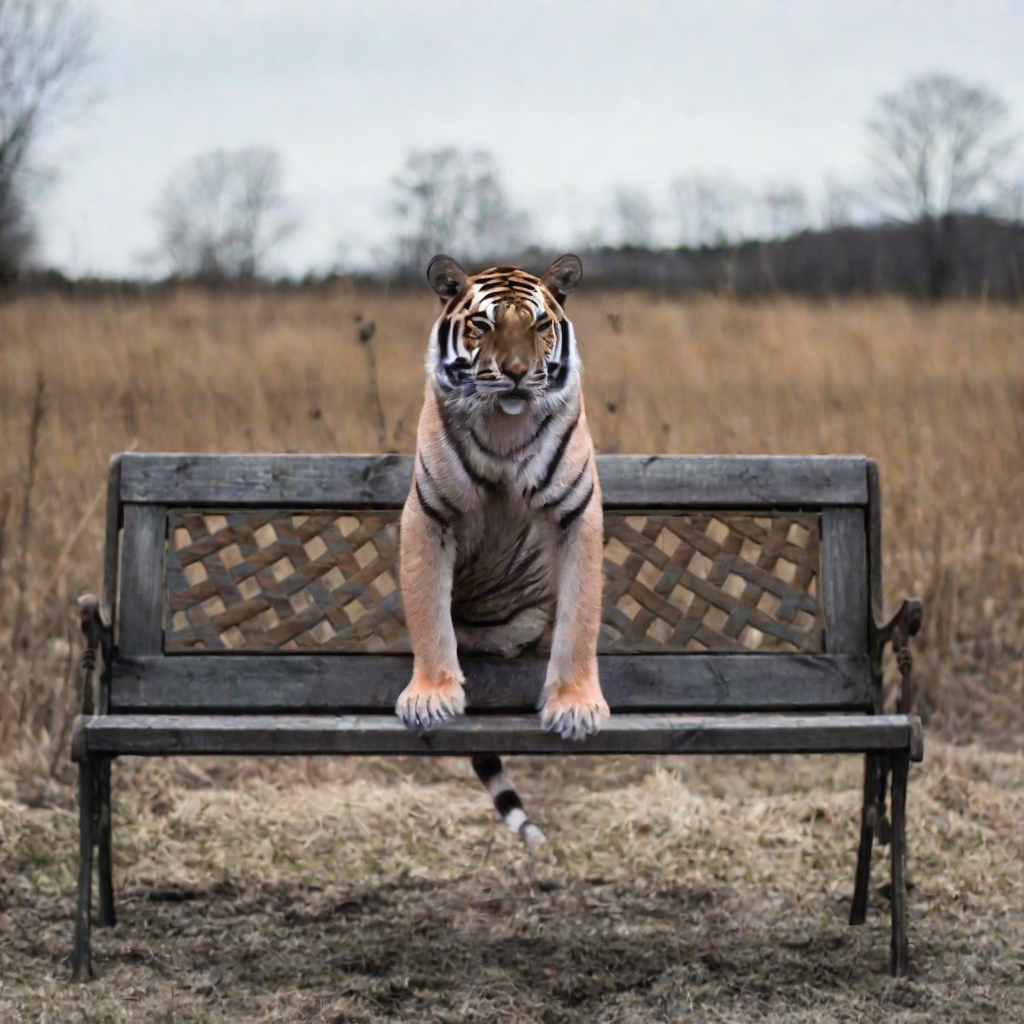

In [10]:
%%time
smashed_model(prompt, input_image=image, mask_image=mask_image, num_inference_steps=50)[0]